In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
DATADIR = '/content/drive/My Drive/PlateNumberDataset/'
CATEGORIES = ["plate_number", "negative_images"]

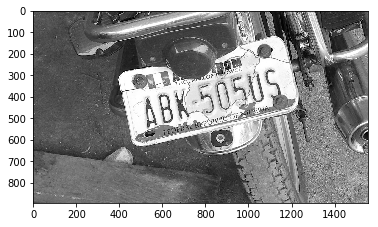

In [8]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [9]:
print(img_array.shape)
# the picture is too large

(893, 1555)


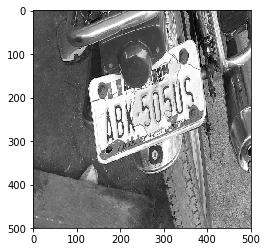

In [10]:
IMG_SIZE = 500

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    
create_training_data()

In [12]:
print(len(training_data))

100


In [0]:
import random

random.shuffle(training_data)

In [0]:
# for sample in training_data[:10]:
#     print(sample[1])

In [0]:
X = []
y = []

In [0]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

## Using Convolutional Neural Network

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [23]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1)) 
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

model.fit(X, y, batch_size=10, epochs=10, validation_split=0.1) 

Train on 90 samples, validate on 10 samples
Epoch 1/10
90/90 [==============================] - 59s 655ms/sample - loss: 16.5261 - acc: 0.5333 - val_loss: 0.9364 - val_acc: 0.7000
Epoch 2/10
90/90 [==============================] - 59s 655ms/sample - loss: 0.7699 - acc: 0.7333 - val_loss: 0.2710 - val_acc: 0.9000
Epoch 3/10
90/90 [==============================] - 59s 652ms/sample - loss: 0.3856 - acc: 0.8889 - val_loss: 0.4003 - val_acc: 0.9000
Epoch 4/10
90/90 [==============================] - 59s 655ms/sample - loss: 0.1886 - acc: 0.9111 - val_loss: 0.6584 - val_acc: 0.9000
Epoch 5/10
90/90 [==============================] - 58s 645ms/sample - loss: 0.0708 - acc: 0.9556 - val_loss: 0.6746 - val_acc: 0.9000
Epoch 6/10
90/90 [==============================] - 58s 650ms/sample - loss: 0.0728 - acc: 0.9556 - val_loss: 0.9209 - val_acc: 0.8000
Epoch 7/10
90/90 [==============================] - 58s 650ms/sample - loss: 0.0189 - acc: 1.0000 - val_loss: 1.2470 - val_acc: 0.8000
Epoch 8/10